In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from scipy.linalg import lu_factor, lu_solve

In [2]:
data = pd.read_csv("HeightVsWeight.csv")
data = np.array(data)
print(data.shape)

x = data[:, 0]
y = data[:, 1]

print(x.shape)
print(y.shape)

n = 5
N = x.size

A = np.zeros((N, n+1))
for i in range(n+1):
    A[:,i] = x**i

print("A = \n", A)


(71, 2)
(71,)
(71,)
A = 
 [[1.00000000e+00 1.00000000e+01 1.00000000e+02 1.00000000e+03
  1.00000000e+04 1.00000000e+05]
 [1.00000000e+00 1.10000000e+01 1.21000000e+02 1.33100000e+03
  1.46410000e+04 1.61051000e+05]
 [1.00000000e+00 1.20000000e+01 1.44000000e+02 1.72800000e+03
  2.07360000e+04 2.48832000e+05]
 [1.00000000e+00 1.30000000e+01 1.69000000e+02 2.19700000e+03
  2.85610000e+04 3.71293000e+05]
 [1.00000000e+00 1.40000000e+01 1.96000000e+02 2.74400000e+03
  3.84160000e+04 5.37824000e+05]
 [1.00000000e+00 1.50000000e+01 2.25000000e+02 3.37500000e+03
  5.06250000e+04 7.59375000e+05]
 [1.00000000e+00 1.60000000e+01 2.56000000e+02 4.09600000e+03
  6.55360000e+04 1.04857600e+06]
 [1.00000000e+00 1.70000000e+01 2.89000000e+02 4.91300000e+03
  8.35210000e+04 1.41985700e+06]
 [1.00000000e+00 1.80000000e+01 3.24000000e+02 5.83200000e+03
  1.04976000e+05 1.88956800e+06]
 [1.00000000e+00 1.90000000e+01 3.61000000e+02 6.85900000e+03
  1.30321000e+05 2.47609900e+06]
 [1.00000000e+00 2.00000

In [3]:
''' RISOLUZIONE CON EQUAZIONI NORMALI'''
ATA = np.dot(A.T, A) 
ATy = np.dot(A.T, y)

lu, piv = lu_factor(ATA)

alpha_normali = lu_solve((lu, piv), ATy)
print(alpha_normali)


''' RISOLUZIONE CON SVD '''

U, s, Vh = scipy.linalg.svd(A)

print('Shape of U:', U.shape)
print('Shape of s:', s.shape)
print('Shape of V:', Vh.T.shape)

alpha_svd = np.zeros(s.shape)

for i in range(n+1): 
	ui = U[:,i] #colonne della matrice U
	vi = Vh[i,:] #righe della matrice Vh
	alpha_svd = alpha_svd + (np.dot(ui,y) * vi)/ s[i]

print(alpha_svd)


[ 1.44106455e+02 -1.20997113e+00  8.37510378e-02 -2.06367643e-03
  2.47181148e-05 -9.99497244e-08]
Shape of U: (71, 71)
Shape of s: (6,)
Shape of V: (6, 6)
[ 1.44106455e+02 -1.20997116e+00  8.37510387e-02 -2.06367644e-03
  2.47181148e-05 -9.99497240e-08]


Errore di approssimazione con Eq. Normali:  11.196867759146723
Errore di approssimazione con SVD:  11.196867759147041


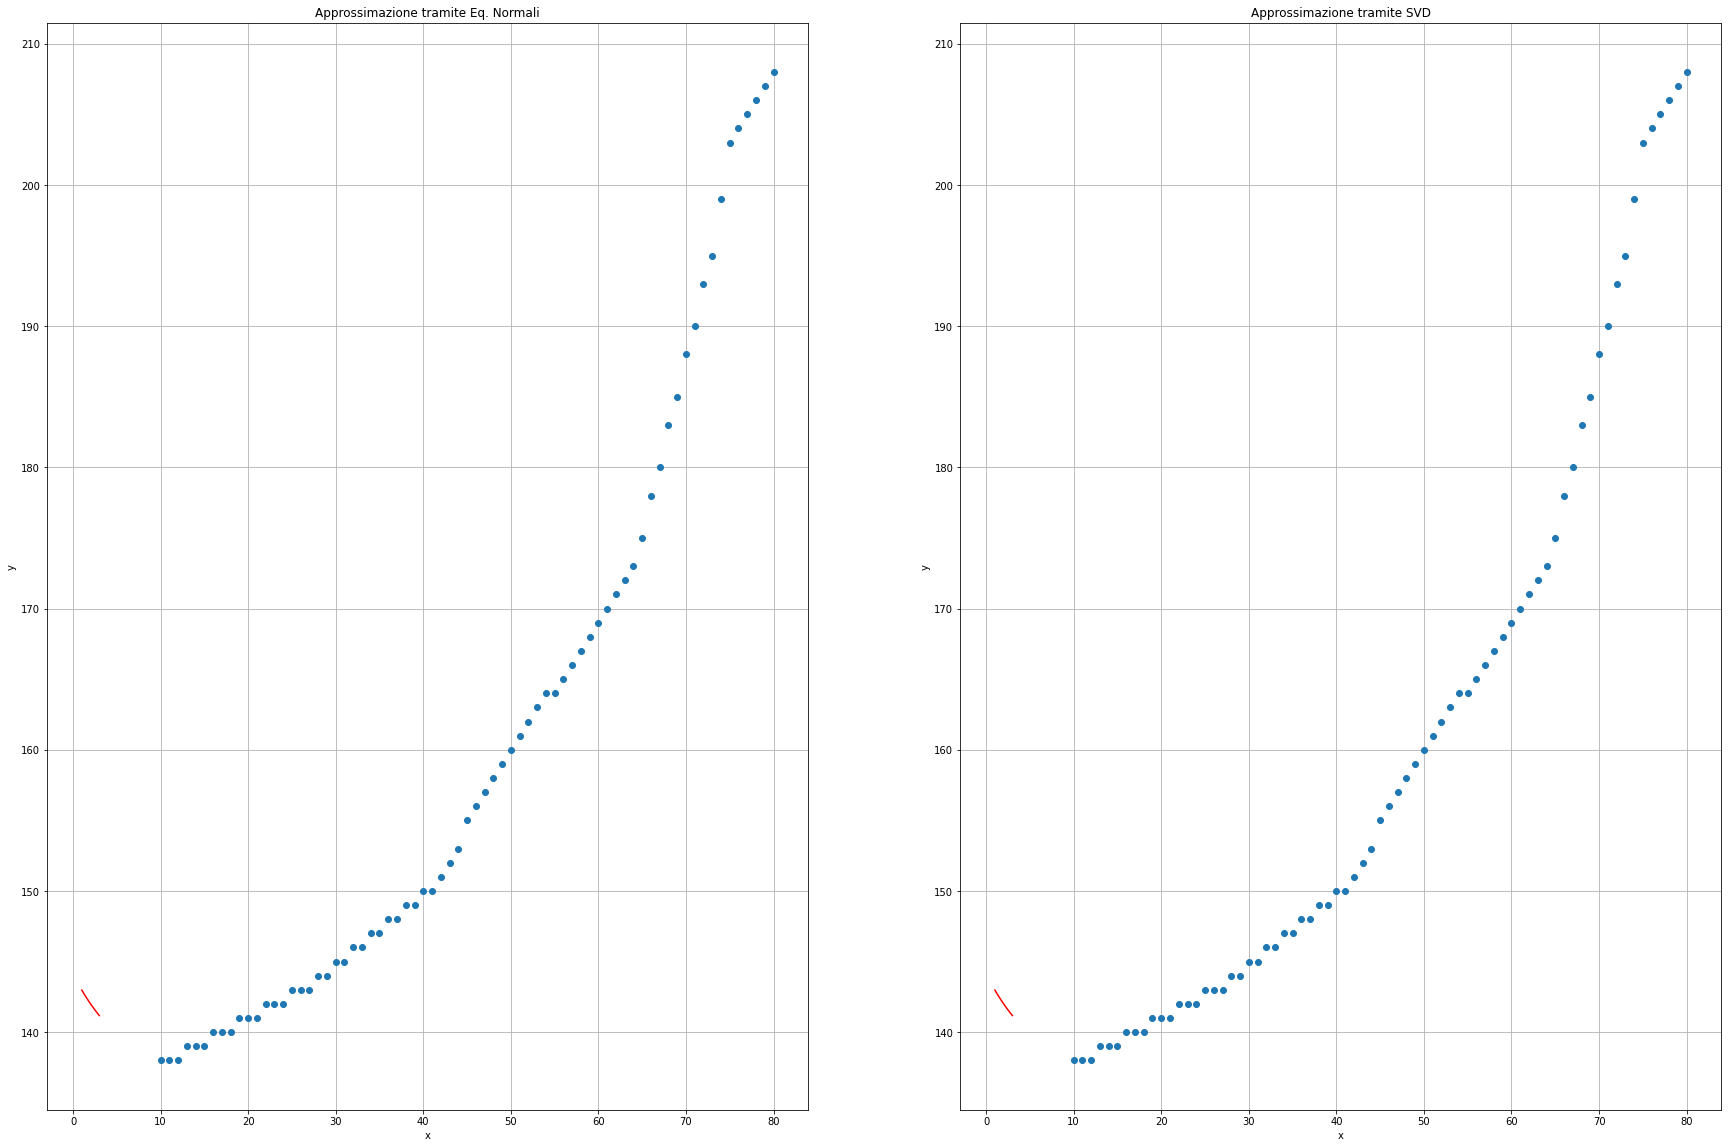

In [5]:
''' VISUALIZZAZIONE DEI RISULTATI '''

# Funzione per valutare il polinomio p, in un punto x, dati i coefficienti alpha
def p(alpha, x):
  N = len(x) #Numero dei dati passati come argomento
  n = len(alpha) #5 + 1 (poichè ^0 incluso)
  A = np.zeros((N,n))
  for i in range(n):
    A[:, i] = x ** i
  y= A @ alpha  
  return y


y_normali = p(alpha_normali, x)
y_svd = p(alpha_svd, x)

err_normali = np.linalg.norm (y-y_normali, 2) 
err_svd = np.linalg.norm (y-y_svd, 2) 
print ('Errore di approssimazione con Eq. Normali: ', err_normali)
print ('Errore di approssimazione con SVD: ', err_svd)

x_plot = np.linspace(1, 3, 100)
y_normali = p(alpha_normali, x_plot)
y_svd = p(alpha_svd, x_plot)

plt.figure(figsize=(30, 20))

plt.subplot(1, 2, 1)
plt.plot(x, y, 'o')
plt.plot(x_plot, y_normali, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Approssimazione tramite Eq. Normali')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(x, y, 'o')
plt.plot(x_plot, y_svd, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Approssimazione tramite SVD')
plt.grid()

plt.show()